In [1]:
## import libraries
import pandas as pd
import numpy as np
import os
from os import listdir

In [2]:
## give me all files in the folder
print(os.listdir("/data/in/tables/"))

['out.c-main.forecast_sales.csv', 'out.c-main.forecast_sales.csv.manifest']


In [3]:
## this is the file then
file = "/data/in/tables/out.c-main.forecast_sales.csv"

In [4]:
## create dataframe object from the data
model = pd.read_csv(file)

In [5]:
## whats up now
model.columns

Index(['ds', 't', 'trend', 'seasonal_lower', 'seasonal_upper', 'trend_lower',
       'trend_upper', 'yhat_lower', 'yhat_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper', 'seasonal',
       'yhat', 'quantity'],
      dtype='object')

In [6]:
## data ranges
minimum = min(model["ds"])
maximum = max(model["ds"])
missing_dates = model[np.isnan(model['quantity'])]
start_forecast = missing_dates.iloc[0]["ds"]
end_forecast = missing_dates.iloc[-1]["ds"]
minimum, maximum, start_forecast, end_forecast

('2014-02-04', '2015-01-28', '2014-10-31', '2015-01-28')

In [7]:
## just in case, date conversion
model['ds'] = pd.to_datetime(model['ds'])
## dataframe info
#model.describe
model.dtypes

ds                datetime64[ns]
t                        float64
trend                    float64
seasonal_lower           float64
seasonal_upper           float64
trend_lower              float64
trend_upper              float64
yhat_lower               float64
yhat_upper               float64
weekly                   float64
weekly_lower             float64
weekly_upper             float64
yearly                   float64
yearly_lower             float64
yearly_upper             float64
seasonal                 float64
yhat                     float64
quantity                 float64
dtype: object

In [9]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [10]:
#prediction = model[['ds','yhat_lower','quantity','yhat_upper']]
#prediction = model[['ds','yhat_lower','quantity','yhat_upper','yhat','trend','trend_lower','trend_upper']]
prediction = model
prediction.head()

ds         t      trend  seasonal_lower  seasonal_upper  \
0 2014-02-04  0.000000  11.898089      -20.040099      -20.040099   
1 2014-02-05  0.003731  12.228785      -14.582592      -14.582592   
2 2014-02-06  0.007463  12.559482      -15.480227      -15.480227   
3 2014-02-07  0.011194  12.890179      -19.730748      -19.730748   
4 2014-02-08  0.014925  13.220875      -19.096363      -19.096363   

   trend_lower  trend_upper  yhat_lower  yhat_upper     weekly  weekly_lower  \
0    11.898089    11.898089  -39.289951   20.598438   4.232679      4.232679   
1    12.228785    12.228785  -31.982350   28.280061   4.613898      4.613898   
2    12.559482    12.559482  -32.957724   25.045041  -0.721072     -0.721072   
3    12.890179    12.890179  -37.711706   24.259128  -8.720244     -8.720244   
4    13.220875    13.220875  -35.090737   23.040418 -11.118075    -11.118075   

   weekly_upper     yearly  yearly_lower  yearly_upper   seasonal      yhat  \
0      4.232679 -24.272778    -24.272778    -24.272778 -20.040099 -8.142011   
1      4.613898 -19.196490    -19.196490    -19.196490 -14.582592 -2.353807   
2     -0.721072 -14.759154    -14.759154    -14.759154 -15.480227 -2.920745   
3     -8.720244 -11.010503    -11.010503    -11.010503 -19.730748 -6.840569   
4    -11.118075  -7.978288     -7.978288     -7.978288 -19.096363 -5.875488   

   quantity  
0       1.0  
1       2.0  
2       0.0  
3       1.0  
4       2.0

In [11]:
"""
prediction_test = prediction
prediction_test.index = list(prediction_test['ds'])
prediction_test.drop('ds',axis=1)
prediction_test = prediction_test.drop('ds', 1)
prediction_test.head()
#new_index = model['ds']
#prediction.set_index(new_index)
##my_plot = prediction.plot(figsize=(12,6))
##my_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
"""

"\nprediction_test = prediction\nprediction_test.index = list(prediction_test['ds'])\nprediction_test.drop('ds',axis=1)\nprediction_test = prediction_test.drop('ds', 1)\nprediction_test.head()\n#new_index = model['ds']\n#prediction.set_index(new_index)\n##my_plot = prediction.plot(figsize=(12,6))\n##my_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))\n"

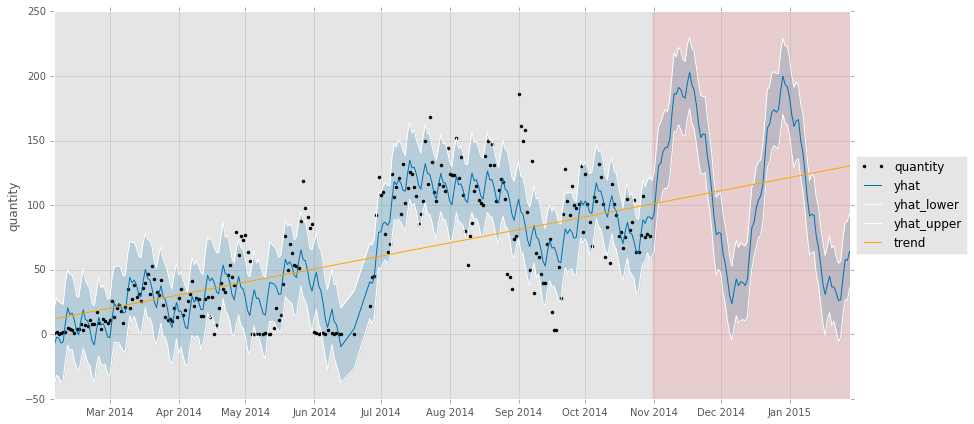

In [12]:
## plot everything on one chart
xlabel='ds'
ylabel='quantity'
forecast_color = '#0072B2'
face_color = 'white'
fig = plt.figure(facecolor='w', figsize=(12, 6))
ax = fig.add_subplot(111)
ax.plot(prediction[xlabel].values, prediction[ylabel], 'k.')
ax.plot(prediction[xlabel].values, prediction['yhat'], ls='-', c=forecast_color)
ax.plot(prediction[xlabel].values, prediction['yhat_lower'], ls='-', c=face_color)
ax.plot(prediction[xlabel].values, prediction['yhat_upper'], ls='-', c=face_color)
ax.plot(prediction[xlabel].values, prediction['trend'], ls='-', c="orange")
ax.fill_between(
                prediction[xlabel].values, prediction['yhat_lower'], prediction['yhat_upper'],
                color=forecast_color, alpha=0.2)
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
plt.axvspan(start_forecast, end_forecast, color='red', alpha=0.1)
#ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
fig.tight_layout()